<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/Player_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/understat_metadata_big5_1415_2021_latest.csv.txt?raw=true

--2021-05-06 19:38:13--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/understat_metadata_big5_1415_2021_latest.csv.txt?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/understat_metadata_big5_1415_2021_latest.csv.txt [following]
--2021-05-06 19:38:13--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/understat_metadata_big5_1415_2021_latest.csv.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/understat_metadata_big5_1415_2021_latest.csv.txt [following]
--2021-05-06 19:38:14--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/understat_m

In [3]:
data=pd.read_csv("/content/understat_metadata_big5_1415_2021_latest.csv.txt?raw=true")

In [4]:
data_19=data[data["year"]==2019]

In [5]:
data_19

,player_id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_name,npg,npxG,xGChain,xGBuildup,year
2499,675,Jack Grealish,36,3235,8,6.844704,6,7.637995,73,92,8,0,F M,Aston Villa,8,6.083535,18.373642,9.304537,2019
2500,7722,Trézéguet,34,1955,6,5.345049,1,0.958256,50,21,2,1,F M S,Aston Villa,6,5.345049,6.641215,2.611431,2019
2501,7724,Wesley,21,1806,5,7.270558,1,0.883616,36,11,3,0,F,Aston Villa,5,6.509389,8.007936,2.674765,2019
2502,5612,Anwar El Ghazi,34,2082,4,6.381360,4,2.877202,53,30,3,0,F M S,Aston Villa,3,5.620191,8.016559,2.210284,2019
2503,6122,Douglas Luiz,36,2602,3,2.277795,2,2.004115,38,17,8,0,M S,Aston Villa,3,2.277795,5.569815,3.396518,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,7882,Sheraldo Becker,13,534,0,0.226366,2,0.938184,6,8,1,0,M S,Union Berlin,0,0.226366,1.335867,0.696946,2019
5227,7884,Ken Reichel,7,536,0,0.219972,0,0.624844,5,2,0,0,D M S,Union Berlin,0,0.219972,1.127549,0.751512,2019
5228,7885,Joshua Mees,15,294,0,0.420813,1,0.274710,9,4,1,0,M S,Union Berlin,0,0.420813,0.750796,0.284732,2019
5229,7995,Akaki Gogia,3,116,0,0.018414,0,0.308683,1,4,0,0,F S,Union Berlin,0,0.018414,0.308683,0.000000,2019


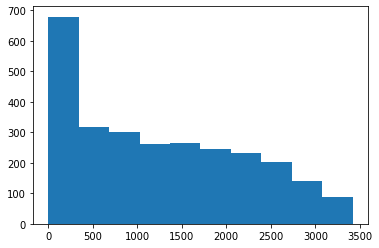

In [6]:
plt.hist(data_19["time"])
plt.show()

We atleast want the player to be involved in 2000 minutes of football action or else the sample to too small to analyze a player

In [7]:
data_19=data_19.loc[data_19["time"]>=2000]

In [8]:
data_19.drop(["year","player_id"],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
data_19

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_name,npg,npxG,xGChain,xGBuildup
2499,Jack Grealish,36,3235,8,6.844704,6,7.637995,73,92,8,0,F M,Aston Villa,8,6.083535,18.373642,9.304537
2502,Anwar El Ghazi,34,2082,4,6.381360,4,2.877202,53,30,3,0,F M S,Aston Villa,3,5.620191,8.016559,2.210284
2503,Douglas Luiz,36,2602,3,2.277795,2,2.004115,38,17,8,0,M S,Aston Villa,3,2.277795,5.569815,3.396518
2505,John McGinn,28,2323,3,3.982573,3,2.617759,55,37,3,0,M S,Aston Villa,3,3.982573,9.970861,5.289585
2506,Tyrone Mings,33,2902,2,0.916616,2,0.571325,8,7,7,0,D,Aston Villa,2,0.916616,5.111491,5.068005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,Marvin Friedrich,31,2790,2,1.881706,0,0.049277,28,2,9,1,D,Union Berlin,2,1.881706,2.461386,2.416710
5213,Robert Andrich,30,2588,1,2.304951,2,1.877011,49,32,11,1,M,Union Berlin,1,2.304951,8.147461,4.797937
5220,Rafal Gikiewicz,33,2970,0,0.833815,0,0.165857,2,2,0,0,GK,Union Berlin,0,0.833815,2.588851,2.422993
5224,Christopher Trimmel,32,2864,0,0.086368,8,7.395264,5,67,6,0,D M,Union Berlin,0,0.086368,4.503684,3.418534


In [10]:
pd.unique(data["position"])

array(['F', 'F M', 'M S', 'F M S', 'M', 'D', 'D S', 'S', 'GK', 'F S',
       'D F M S', 'D M S', 'D M', 'GK S', 'D F S', 'D F', 'D F M'],
      dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder
X=pd.DataFrame(data_19["position"])
enc = OneHotEncoder()
enc.fit(X)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [12]:
enc.transform(X).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [13]:
enc.categories_

[array(['D', 'D F M S', 'D M', 'D M S', 'D S', 'F', 'F M', 'F M S', 'F S',
        'GK', 'GK S', 'M', 'M S'], dtype=object)]

In [14]:
data_19[enc.categories_[0]]=enc.transform(X).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [15]:
names=data_19["player_name"]
data_19=data_19.set_index("player_name")

In [16]:
data_19.drop(["position","games"],inplace=True,axis=1)

In [17]:
for i in ["goals","xG","assists","xA","shots","key_passes","yellow_cards","red_cards","npg","npxG","xGChain","xGBuildup"]:
  data_19[i]=data_19[i]/data_19["time"]

In [18]:
data_19.drop(["time"],axis=1,inplace=True)

In [19]:
x=data_19.drop(["team_name"],axis=1)

In [20]:
max=np.array(x.describe().loc["max"])
j=0
for i in x.columns:
  x[i]=x[i]/max[j]
  j=j+1

In [21]:
x

,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,D,D F M S,D M,D M S,D S,F,F M,F M S,F S,GK,GK S,M,M S
player_name,,,,,,,,,,,,,,,,,,,,,,,,,
Jack Grealish,0.200964,0.187392,0.209397,0.322658,0.316788,0.602564,0.336176,0.000000,0.235613,0.187738,0.352746,0.289785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Anwar El Ghazi,0.156128,0.271459,0.216907,0.188854,0.357367,0.305302,0.195881,0.000000,0.137285,0.269488,0.239138,0.106960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Douglas Luiz,0.093695,0.077532,0.086779,0.105257,0.205020,0.138430,0.417959,0.000000,0.109849,0.087393,0.132946,0.131517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
John McGinn,0.104948,0.151840,0.145803,0.153999,0.332379,0.337475,0.175559,0.000000,0.123042,0.171153,0.266578,0.229418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tyrone Mings,0.056006,0.027974,0.077808,0.026904,0.038700,0.051108,0.327908,0.000000,0.065662,0.031533,0.109394,0.175953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marvin Friedrich,0.058254,0.059734,0.000000,0.002414,0.140888,0.015189,0.438520,0.373656,0.068298,0.067331,0.054792,0.087272,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Robert Andrich,0.031401,0.078880,0.087249,0.099115,0.265798,0.261984,0.577803,0.402821,0.036814,0.088913,0.195524,0.186787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Rafal Gikiewicz,0.000000,0.024865,0.000000,0.007632,0.009454,0.014268,0.000000,0.000000,0.000000,0.028027,0.054137,0.082196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
x1=x.transpose()

In [23]:
corr_matrix=x1.corr(method="pearson")

In [24]:
corr_matrix

player_name,Jack Grealish,Anwar El Ghazi,Douglas Luiz,John McGinn,Tyrone Mings,Matt Targett,Ezri Konsa Ngoyo,Frederic Guilbert,Dominic Calvert-Lewin,Richarlison,Gylfi Sigurdsson,Michael Keane,Yerry Mina,Tom Davies,Jordan Pickford,Mason Holgate,Lucas Digne,Callum Wilson,Joshua King,Nathan Aké,Steve Cook,Ryan Fraser,Jefferson Lerma,Philip Billing,Adam Smith,Diego Rico,Aaron Ramsdale,Danny Ings,James Ward-Prowse,Nathan Redmond,Ryan Bertrand,Jack Stephens,Jan Bednarek,Pierre-Emile Højbjerg,Alex McCarthy,Jamie Vardy,Ayoze Pérez,Harvey Barnes,James Maddison,Ben Chilwell,...,Kingsley Ehizibue,Rafael Czichos,Timo Horn,Nils Petersen,Lucas Höler,Jonathan Schmid,Christian Günter,Nicolas Höfler,Robin Koch,Dominique Heintz,Alexander Schwolow,Timo Werner,Marcel Sabitzer,Marcel Halstenberg,Lukas Klostermann,Konrad Laimer,Péter Gulácsi,Dayotchanculle Upamecano,Kai Pröger,Klaus Gjasula,Sebastian Schonlau,Jamilu Collins,Sebastian Vasiliadis,Christopher Antwi-Adjei,Leopold Zingerle,Rouwen Hennings,Erik Thommy,Kaan Ayhan,Andre Hoffmann,Matthias Zimmermann,Niko Gießelmann,Adam Bodzek,Sebastian Andersson,Marius Bülter,Christian Gentner,Marvin Friedrich,Robert Andrich,Rafal Gikiewicz,Christopher Trimmel,Christopher Lenz
player_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jack Grealish,1.000000,0.132771,0.052040,0.144393,-0.026862,0.084890,-0.021525,0.023987,0.124191,0.910246,0.166453,-0.041295,-0.010607,0.035296,-0.114400,0.004193,0.168037,0.123563,0.107757,-0.038445,-0.090805,0.166545,0.006588,0.047537,0.021601,0.072201,-0.127513,0.147172,0.175301,0.943627,-0.000705,-0.081550,-0.065936,0.091106,-0.118499,0.141088,0.146575,0.188551,0.271034,0.113068,...,-0.040359,-0.104673,-0.120514,0.132897,0.122210,0.031536,0.183102,0.031235,-0.014681,-0.068775,-0.128535,0.243513,0.270375,0.094906,0.044162,0.032403,-0.092422,-0.014873,0.133215,0.120228,-0.059507,-0.025082,0.071999,0.135981,-0.112235,0.086443,0.183940,0.059270,-0.039419,0.016874,0.061766,0.012362,0.095307,0.074699,0.084028,-0.081826,0.070086,-0.122363,0.146394,0.030674
Anwar El Ghazi,0.132771,1.000000,-0.000101,0.077442,-0.074578,-0.031365,-0.051061,-0.048768,0.149543,0.121006,0.064494,-0.070085,-0.024170,-0.031338,-0.124342,-0.044328,0.041192,0.089460,0.959989,-0.040165,-0.125777,0.948774,-0.067506,-0.009505,-0.055179,-0.020837,-0.124892,0.823137,0.068976,0.070299,-0.071141,-0.118564,-0.093536,0.019446,-0.127078,0.152658,0.944861,0.929091,0.133266,-0.006215,...,-0.096866,-0.113244,-0.125135,0.936965,0.968355,-0.005184,0.051400,-0.024821,-0.020895,-0.102441,-0.129768,0.767673,0.148616,-0.022199,-0.029423,-0.065900,-0.117594,-0.089369,0.953771,0.011426,-0.081380,-0.080610,-0.004607,0.060741,-0.125242,0.101729,0.102690,-0.005410,-0.066787,-0.052774,-0.028095,-0.046418,0.106592,0.029598,0.016617,-0.096006,-0.007143,-0.118805,0.014203,-0.033833
Douglas Luiz,0.052040,-0.000101,1.000000,0.932251,0.010586,-0.003128,-0.028184,0.036637,0.060769,0.047464,0.904812,-0.037148,-0.023598,0.970527,-0.073441,0.017969,0.014261,0.064096,-0.071691,-0.053461,-0.025281,-0.020390,0.912595,0.991538,0.051306,0.024563,-0.100659,-0.006183,0.047299,-0.025485,-0.065800,-0.061556,-0.037787,0.016752,-0.096524,-0.017467,-0.051035,-0.038844,0.847043,-0.015432,...,-0.019754,-0.093022,-0.097336,-0.038975,0.000305,-0.056317,-0.030687,0.984766,-0.031954,-0.055252,-0.098475,0.014708,0.026655,-0.028866,-0.056718,-0.004783,-0.091416,-0.010434,-0.051150,0.170610,-0.047107,-0.010007,0.073135,-0.021205,-0.079578,0.003916,0.008085,0.070192,0.028432,-0.023585,0.042456,0.953427,0.006108,-0.048062,0.970078,0.010822,0.067273,-0.098901,0.006398,-0.043422
John McGinn,0.144393,0.077442,0.932251,1.000000,-0.054780,0.013009,-0.045253,-0.023966,0.082101,0.086668,0.985099,-0.050150,-0.022782,0.870578,-0.102365,-0.019868,0.063186,0.051345,0.042111,-0.045860,-0.101624,0.083464,0.813801,0.926081,-0.025833,-0.000101,-0.110853,0.085461,0.082710,0.073803,-0.040328,-0.095653,-0.072814,0.054682,-0.099694,0.073826,0.0828

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=0).fit(corr_matrix)

In [26]:
for i in range(len(kmeans.labels_)):
  if kmeans.labels_[i]==0:
    #print(x.iloc[i])
    pass

In [27]:
len(kmeans.labels_)

704

In [28]:
len(kmeans.cluster_centers_)

8

In [29]:
from sklearn.decomposition import PCA
X=PCA(n_components=2).fit_transform(x)

In [30]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=8,assign_labels="discretize", random_state=0).fit(x)

In [31]:
clustering.labels_

array([2, 3, 0, 0, 5, 4, 4, 4, 7, 2, 0, 4, 4, 0, 6, 1, 2, 7, 3, 5, 4, 3,
       0, 0, 5, 5, 6, 3, 2, 2, 1, 4, 5, 1, 6, 7, 3, 3, 0, 2, 2, 0, 0, 5,
       5, 6, 2, 3, 5, 0, 1, 4, 2, 5, 6, 7, 0, 1, 0, 4, 0, 6, 5, 5, 7, 3,
       3, 0, 5, 0, 4, 6, 7, 0, 5, 4, 5, 0, 2, 6, 4, 7, 3, 3, 5, 1, 1, 0,
       4, 3, 3, 4, 0, 6, 0, 3, 3, 4, 5, 1, 6, 7, 3, 3, 5, 0, 0, 4, 4, 0,
       6, 3, 0, 7, 3, 1, 0, 4, 1, 6, 7, 7, 3, 5, 5, 6, 1, 0, 7, 3, 3, 0,
       4, 0, 2, 4, 6, 4, 4, 7, 2, 5, 2, 5, 2, 6, 7, 3, 5, 5, 3, 0, 6, 0,
       4, 7, 3, 2, 1, 1, 1, 1, 0, 0, 6, 5, 7, 0, 0, 5, 5, 5, 0, 6, 5, 4,
       3, 7, 0, 0, 0, 5, 4, 4, 4, 6, 7, 3, 3, 0, 0, 4, 4, 4, 4, 1, 6, 1,
       5, 3, 2, 6, 1, 7, 1, 3, 2, 0, 2, 6, 5, 7, 2, 3, 0, 0, 4, 4, 6, 7,
       2, 3, 0, 4, 1, 6, 3, 3, 0, 4, 4, 5, 0, 5, 6, 3, 3, 1, 0, 5, 0, 5,
       1, 4, 6, 7, 5, 2, 0, 0, 5, 5, 6, 7, 7, 0, 3, 0, 5, 4, 6, 4, 2, 0,
       4, 5, 6, 4, 7, 3, 3, 2, 1, 4, 6, 5, 1, 0, 3, 0, 3, 3, 4, 0, 5, 0,
       6, 3, 7, 3, 3, 4, 0, 4, 4, 6, 4, 3, 0, 0, 4,

In [42]:
from sklearn.mixture import GaussianMixture
gmixture = GaussianMixture(random_state=0,n_components=8).fit(corr_matrix)
labels_gm=gmixture.predict(corr_matrix)

In [43]:
labels_gm

array([7, 0, 3, 3, 4, 2, 2, 2, 6, 7, 3, 2, 2, 3, 5, 1, 7, 6, 0, 4, 2, 0,
       3, 3, 4, 4, 5, 0, 7, 7, 1, 2, 4, 1, 5, 6, 0, 0, 3, 7, 7, 3, 3, 4,
       4, 5, 7, 0, 4, 3, 1, 2, 7, 4, 5, 6, 3, 1, 3, 2, 3, 5, 4, 4, 6, 0,
       0, 3, 4, 3, 2, 5, 6, 3, 4, 2, 4, 3, 7, 5, 2, 6, 0, 0, 4, 1, 1, 3,
       2, 0, 0, 2, 3, 5, 3, 0, 0, 2, 4, 1, 5, 6, 0, 0, 4, 3, 3, 2, 2, 3,
       5, 0, 3, 6, 0, 1, 3, 2, 1, 5, 6, 6, 0, 4, 4, 5, 1, 3, 6, 0, 0, 3,
       2, 3, 7, 2, 5, 2, 2, 6, 7, 4, 7, 4, 7, 5, 6, 0, 4, 4, 0, 3, 5, 3,
       2, 6, 0, 7, 1, 1, 1, 1, 3, 3, 5, 4, 6, 3, 3, 4, 4, 4, 3, 5, 4, 2,
       0, 6, 3, 3, 3, 4, 2, 2, 2, 5, 6, 0, 0, 3, 3, 2, 2, 2, 2, 1, 5, 1,
       4, 0, 7, 5, 1, 6, 1, 0, 7, 3, 7, 5, 4, 6, 7, 0, 3, 3, 2, 2, 5, 6,
       7, 0, 3, 2, 1, 5, 0, 0, 3, 2, 2, 4, 3, 4, 5, 0, 0, 1, 3, 4, 3, 4,
       1, 2, 5, 6, 4, 7, 3, 3, 4, 4, 5, 6, 6, 3, 0, 3, 4, 2, 5, 2, 7, 3,
       2, 4, 5, 2, 6, 0, 0, 7, 1, 2, 5, 4, 1, 3, 0, 3, 0, 0, 2, 3, 4, 3,
       5, 0, 6, 0, 0, 2, 3, 2, 2, 5, 2, 0, 3, 3, 2,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


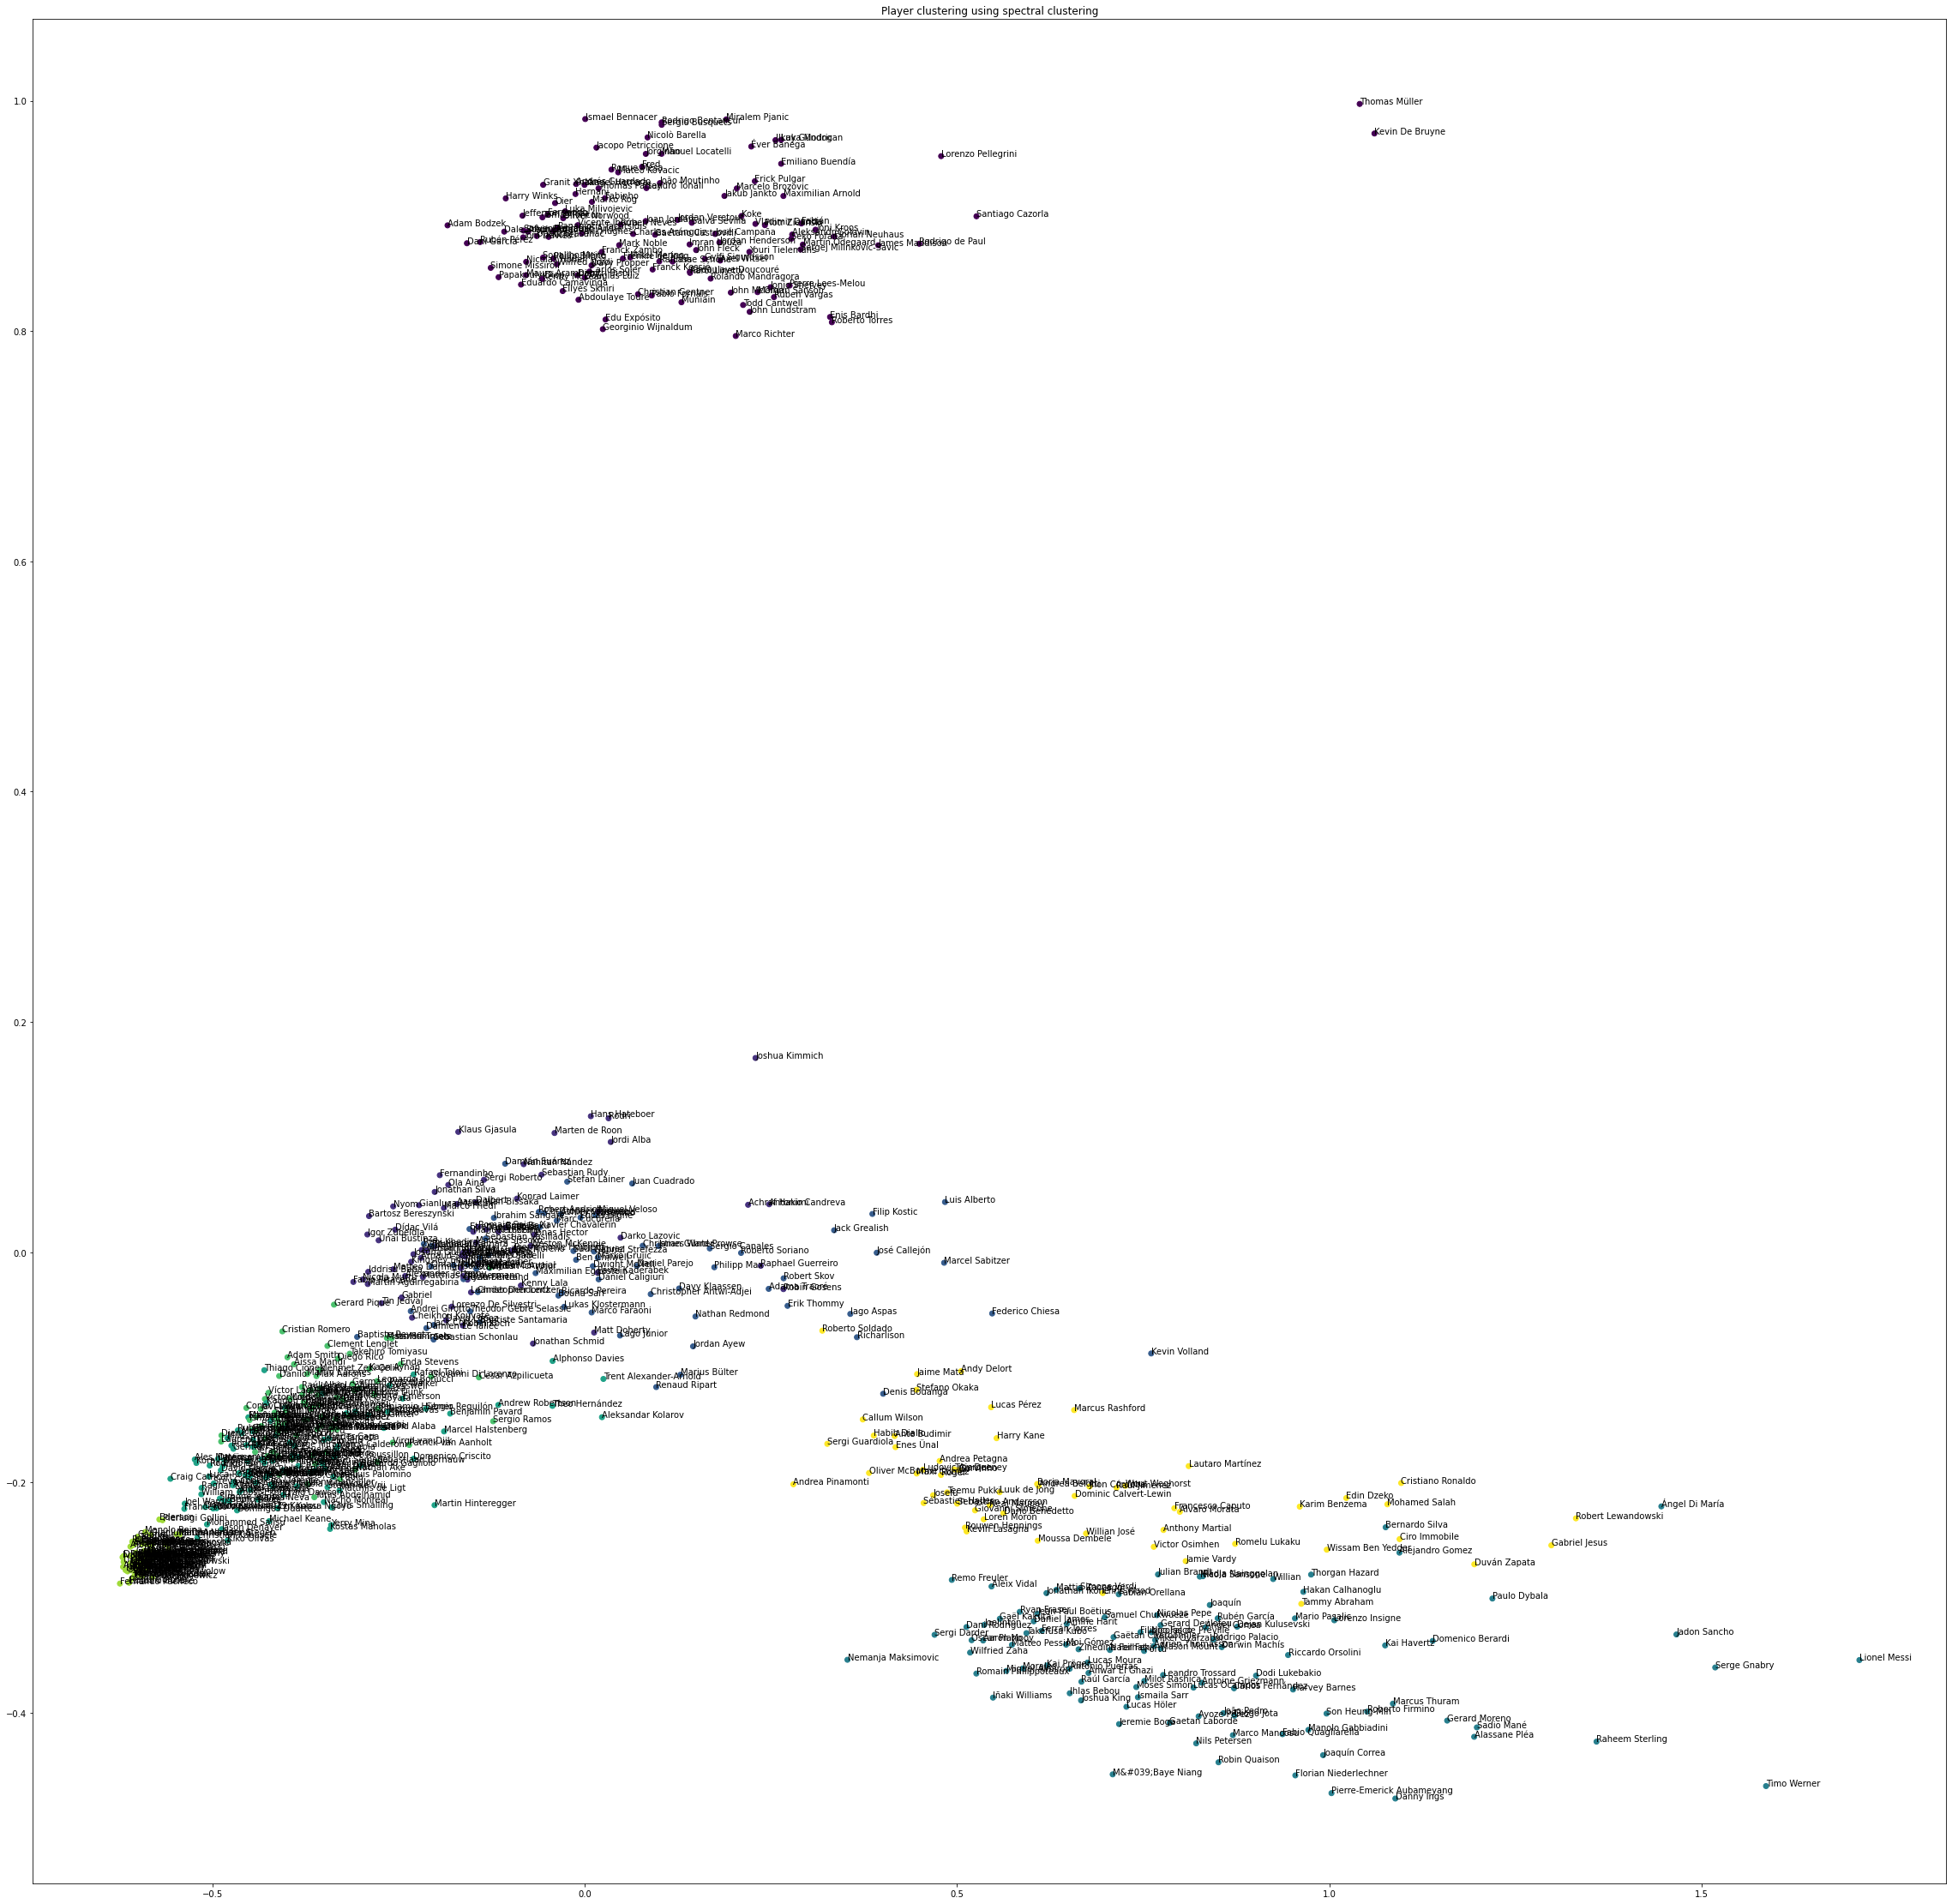

In [33]:
fig=plt.figure(figsize=(40,40))
plt.title("Player clustering using spectral clustering")
names=np.array(names)
ax = fig.add_subplot()
plt.scatter(X[:,0],X[:,1],c=clustering.labels_)
for i in range(len(X)):
  ax.text(X[i][0],X[i][1],names[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


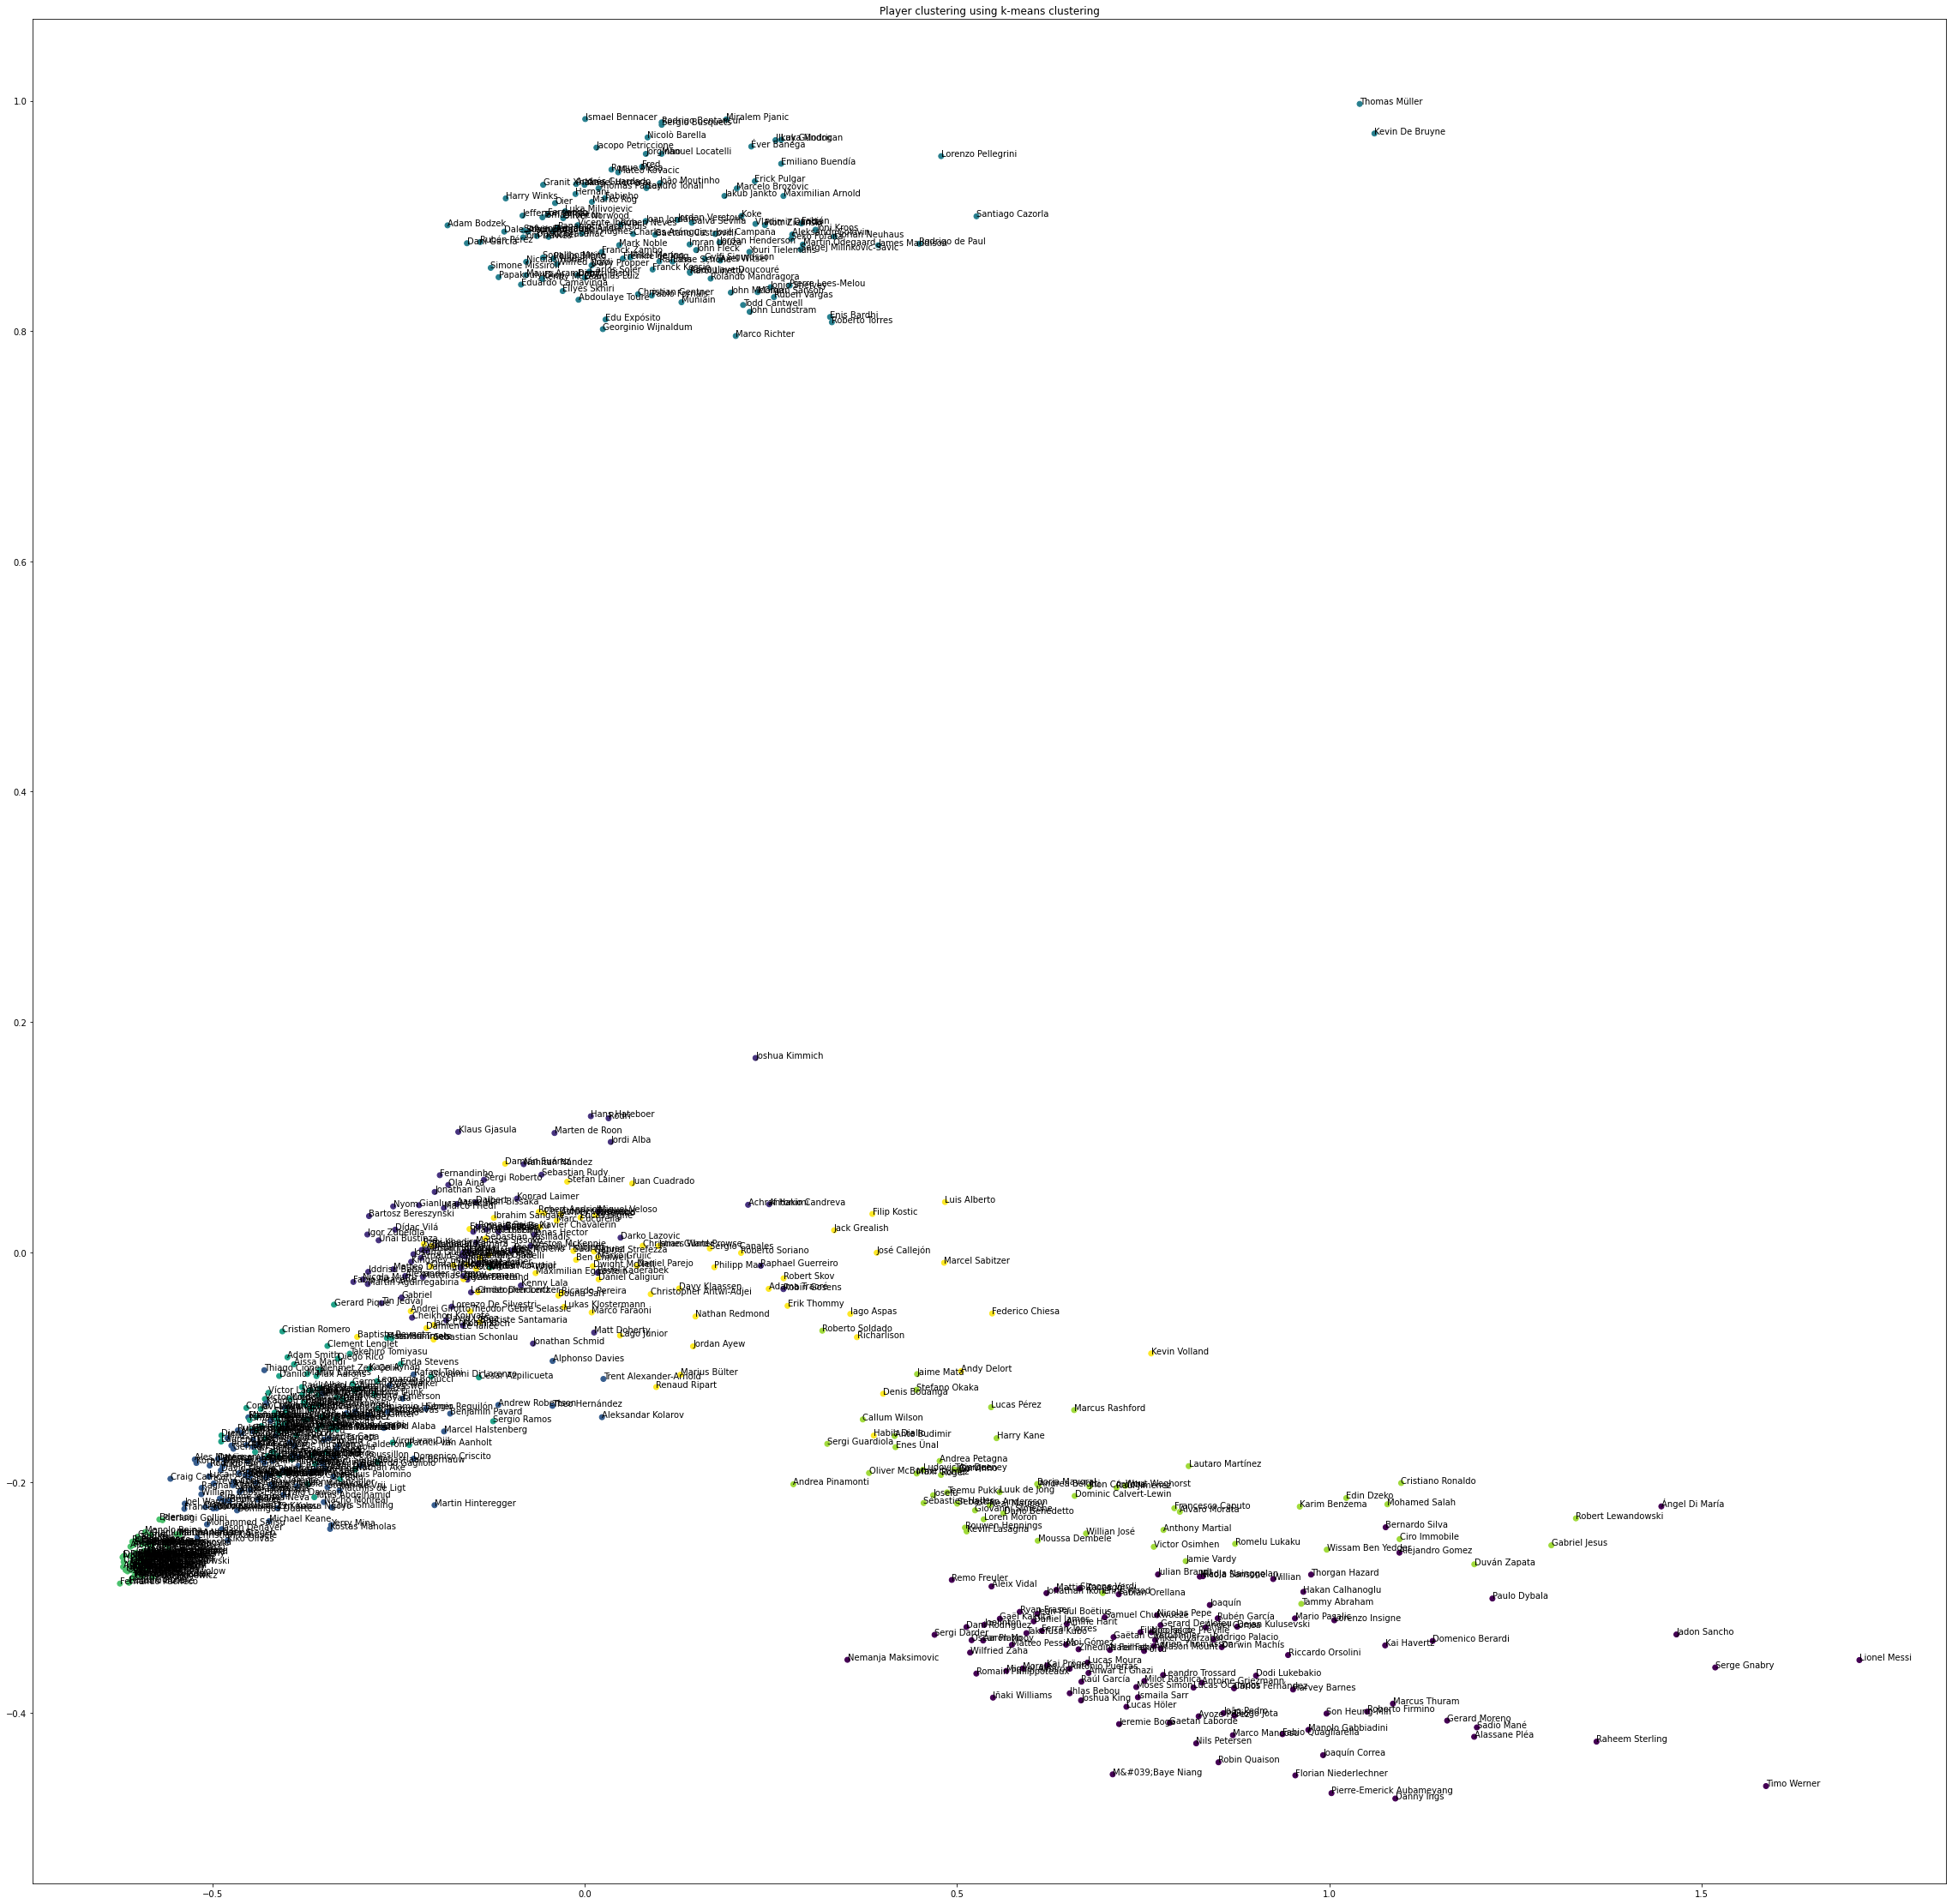

In [34]:
fig=plt.figure(figsize=(40,40))
plt.title("Player clustering using k-means clustering")
names=np.array(names)
ax = fig.add_subplot()
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
for i in range(len(X)):
  ax.text(X[i][0],X[i][1],names[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


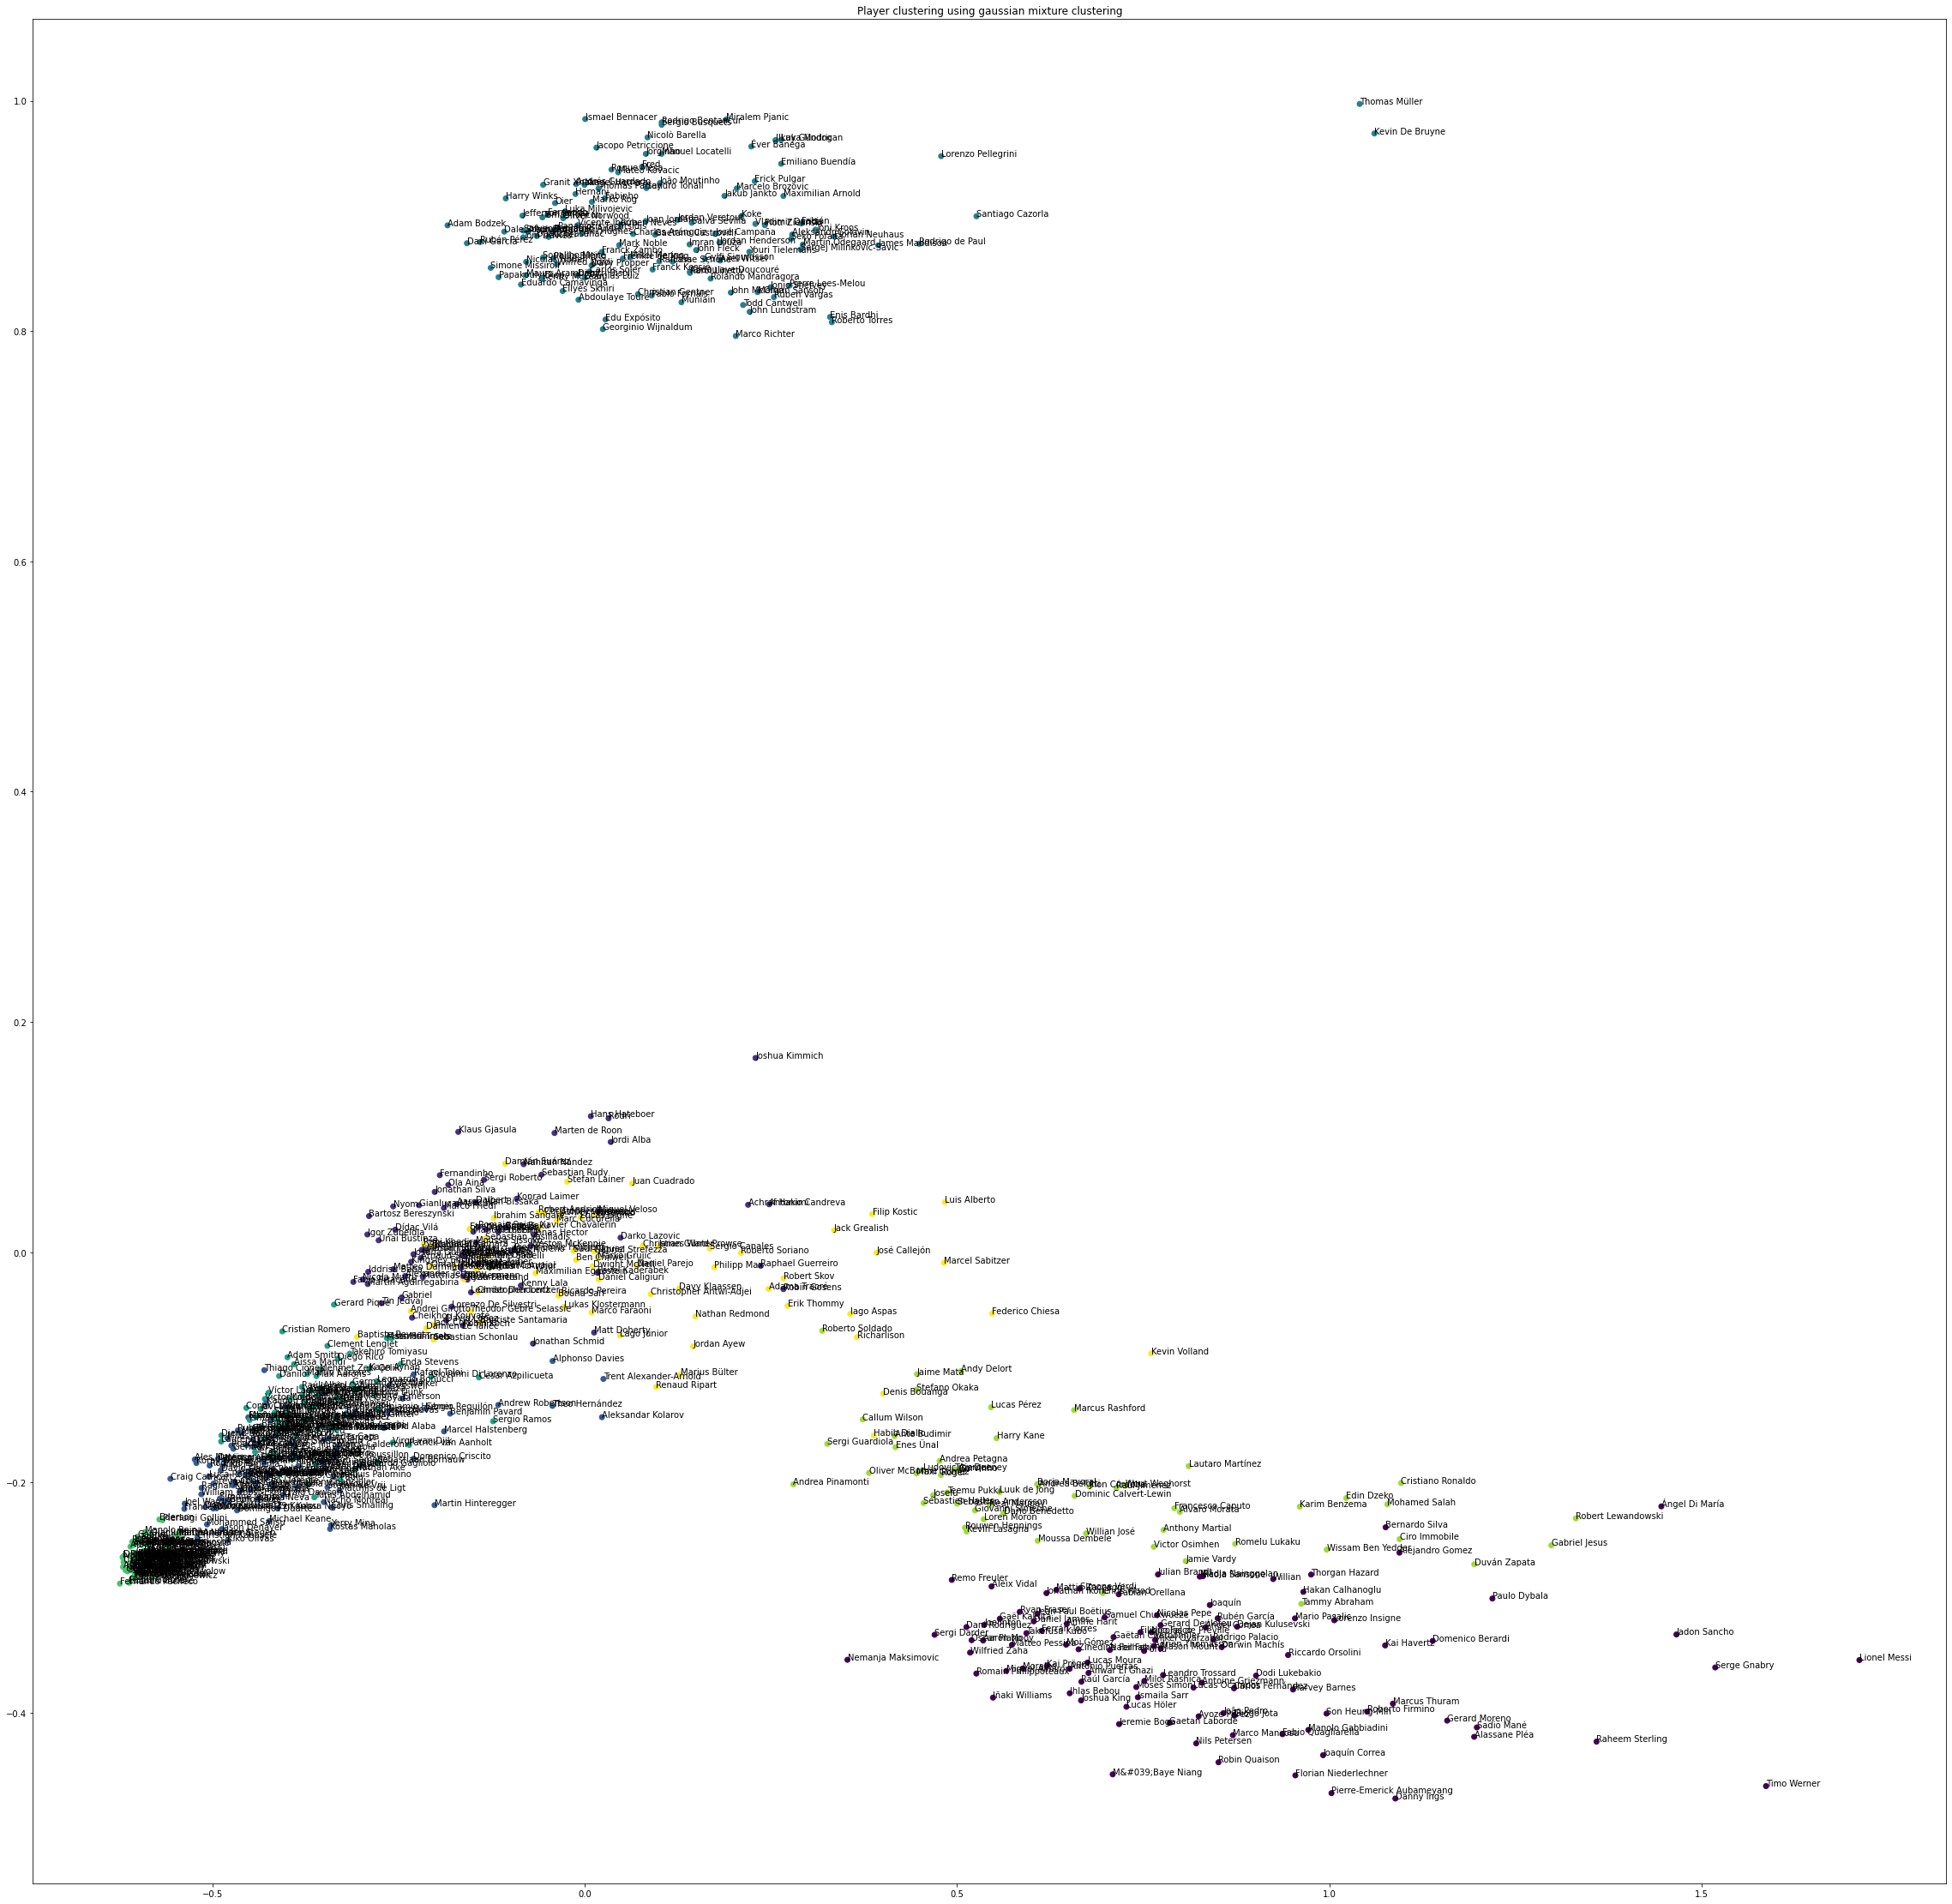

In [44]:
fig=plt.figure(figsize=(40,40))
plt.title("Player clustering using gaussian mixture clustering")
names=np.array(names)
ax = fig.add_subplot()
plt.scatter(X[:,0],X[:,1],c=labels_gm)
for i in range(len(X)):
  ax.text(X[i][0],X[i][1],names[i])